
### EXPLORATORIA BÁSICA, 
- CRIAR dist de frequencia e classes no pandas usando .cut
- COUNTS, 
- CUT
- dist de frequencia
- HISTOGRAMA
- BUBLE PLOT 
- scatter com stat size
- regplot
- facet grid (futuro)
- Pairplot NO Seaborn para explorar variaveis qualitativas com seus respectivos histogramas

In [ ]:
import os
os.getcwd()
os.listdir()
os.chdir("./Aula3-AED/datasets")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
         
import re

# Leitura do dataset ARFF(padrao) do arquivo 'communities.names'
with open('communities.names', 'r') as f:
    lines = f.readlines()

#usando regex para extrair somente os nomes das variaveis do arquivo.
attribute_names = []
for line in lines:
    match = re.match(r'@attribute\s+([\w\d]+)\s+', line, re.IGNORECASE)
    if match:
        attribute_names.append(match.group(1))

print(f"Total attributes extracted: {len(attribute_names)}")

attribute_names

Total attributes extracted: 128


['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

#### *lendo o dataset com as colunas*

In [90]:
df_crimes = pd.read_csv("communities.data", names= attribute_names)

In [96]:

numeric_columns = df_crimes.select_dtypes(include='number').columns
df_numeric = df_crimes[numeric_columns]

- as colunas fold e state devem ser ignoradas. 

- entendendo o dataset

In [103]:
df_numeric.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### leitura do dataset

In [ ]:

# somente cols numericas
numeric_columns = df_crimes.select_dtypes(include='number').columns

# Calculate the number of rows and columns for the grid
n_cols = 3  # You can adjust this to your preference
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate rows needed

# Create the subplots
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically set subplot positions
    sns.histplot(df_crimes[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


### O que poderia estar causando uma incidencia maior de crimes??

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(19, 3, figsize=(36, 220))  # Ajuste o tamanho da figura conforme necessário
ax = ax.ravel()  # Transforma a grade 2D em 1D para iteração fácil
fig.subplots_adjust(hspace=.3, wspace=0.4)

for i, col in enumerate(numeric_columns):
    sns.regplot(data=df_crimes, x=col, y="ViolentCrimesPerPop", ax=ax[i], scatter_kws={'s': df_crimes['NumUnderPov']*500})
    ##exemplo mapeando a faixa de pobreza
    #sns.regplot(data=df_crimes, x=col, y="ViolentCrimesPerPop", ax=ax[i], scatter_kws={'s': df_crimes['NumUnderPov']*100})
    ax[i].set_title(f'{col} vs ViolentCrimesPerPop')

# Desativa os subplots restantes (se houver mais eixos do que colunas)
for j in range(len(numeric_columns), len(ax)):
    fig.delaxes(ax[j])  # Remove o eixo que não será usado

plt.show()



In [ ]:
import pandas as pd

# Para variáveis qualitativas
#freq_categorica = df['categoria'].value_counts(normalize=True)

# Para variáveis quantitativas
freq_numerica = pd.cut(df['altura'], bins = 5).value_counts().sort_index()

# Frequências acumuladas
freq_acumulada = freq_numerica.cumsum()
feq_rel = freq_numerica/freq_numerica.sum()
freq_acumulada
freq_numerica
feq_rel
freq_numerica

altura
(160.478, 164.82]    3
(164.82, 169.14]     5
(169.14, 173.46]     3
(173.46, 177.78]     4
(177.78, 182.1]      5
Name: count, dtype: int64

In [ ]:
freq_numerica.iloc[0]/(164.82-160.478)
0.6909258406264419*(164.82-160.478)

3.0

In [ ]:
import pandas as pd

# Para variáveis qualitativas
#freq_categorica = df['categoria'].value_counts(normalize=True)

# Para variáveis quantitativas
freq_numerica = pd.cut(df['altura'],bins = 5).value_counts().sort_index()

# Frequências acumuladas
freq_acumulada = freq_numerica.cumsum()
freq_numerica
freq_acumulada

sns.histplot(df, x = 'altura', bins=5,stat = 'density')



### **Manipulação de Diferentes Tipos de Variáveis com pandas**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
os.chdir("./")
os.getcwd()
os.listdir()

['dados_exemplo.csv']

In [55]:

# Carregar dados
df = pd.read_csv('dados_exemplo.csv')

# Verificar tipos de dados
df
# Converter tipos
df['categoria_cat'] = df['estado_civil'].astype('category')
df['genero_bool'] = df['genero'].astype('bool')

df
print(df.dtypes)
df
df.dtypes
df

id                   int64
idade                int64
altura             float64
peso               float64
genero              object
escolaridade        object
estado_civil        object
renda               object
filhos               int64
satisfacao           int64
codigo_cliente       int64
categoria_cat     category
genero_bool           bool
dtype: object


,id,idade,altura,peso,genero,escolaridade,estado_civil,renda,filhos,satisfacao,codigo_cliente,categoria_cat,genero_bool
0,1,35,175.5,78.2,Masculino,Superior,Casado,R$2.001-R$5.000,2,4,1001,Casado,True
1,2,42,168.3,65.7,Feminino,Pós-graduação,Casado,R$5.001-R$10.000,1,5,1002,Casado,True
2,3,28,182.1,85.3,Masculino,Médio,Solteiro,Até R$2.000,0,3,1003,Solteiro,True
3,4,55,170.2,72.5,Feminino,Superior,Divorciado,R$2.001-R$5.000,2,4,1004,Divorciado,True
4,5,31,178.6,80.1,Masculino,Superior,Solteiro,R$2.001-R$5.000,0,4,1005,Solteiro,True
5,6,47,165.8,63.2,Feminino,Médio,Casado,Até R$2.000,3,3,1006,Casado,True
6,7,39,173.4,76.8,Masculino,Superior,Casado,R$5.001-R$10.000,2,5,1007,Casado,True
7,8,24,160.5,58.3,Feminino,Médio,Solteiro,Até R$2.000,0,3,1008,Solteiro,True
8,9,52,176.2,82.4,Masculino,Pós-graduação,Casado,Acima de R$10.000,2,4,1009,Casado,True
9,10,33,169.7,64.5,Feminino,Superior,Solteiro,R$2.001-R$5.000,0,4,1010,Solteiro,True


In [88]:
df['height_interval'] = pd.cut(df['altura'],bins = 5) 
df.groupby('height_interval').agg(freq = ('height_interval','count')).assign(
    freq_rel=lambda x: x['freq'] / x['freq'].sum(),
    cumsum = lambda x: np.cumsum(x['freq_rel']),
    )

C:\Users\jailsonr\AppData\Local\Temp\ipykernel_25188\3433424875.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('height_interval').agg(freq = ('height_interval','count')).assign(


,freq,freq_rel,cumsum
height_interval,,,
"(160.478, 164.82]",3,0.15,0.15
"(164.82, 169.14]",5,0.25,0.40
"(169.14, 173.46]",3,0.15,0.55
"(173.46, 177.78]",4,0.20,0.75
"(177.78, 182.1]",5,0.25,1.00


In [125]:


# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_dataset_exemplo():
    """Cria um DataFrame de exemplo com diferentes tipos de variáveis."""
    # Dados para o exemplo
    dados = {
        'idade': np.random.randint(18, 65, 10000),  # Quantitativa discreta
        'peso': np.random.normal(70, 15, 10000),     # Quantitativa contínua
        'altura': np.random.normal(170, 10, 10000),  # Quantitativa contínua
        'genero': np.random.choice(['Masculino', 'Feminino', 'Não-binário'], 10000),  # Qualitativa nominal
        'escolaridade': np.random.choice(
            ['Fundamental', 'Médio', 'Superior', 'Pós-graduação'], 
            10000, 
            p=[0.1, 0.3, 0.4, 0.2]
        ),  # Qualitativa ordinal
        'estado_civil': np.random.choice(
            ['Solteiro', 'Casado', 'Divorciado', 'Viúvo'], 
            10000, 
            p=[0.4, 0.4, 0.15, 0.05]
        ),  # Qualitativa nominal
        'renda': np.random.choice(
            ['Até R$2.000', 'R$2.001-R$5.000', 'R$5.001-R$10.000', 'Acima de R$10.000'],
            10000,
            p=[0.3, 0.4, 0.2, 0.1]
        ),  # Qualitativa ordinal
        'filhos': np.random.choice([0, 1, 2, 3, 4, 5], 10000, p=[0.3, 0.2, 0.3, 0.1, 0.05, 0.05]),  # Quantitativa discreta
        'satisfacao': np.random.choice([1, 2, 3, 4, 5], 10000),  # Qualitativa ordinal (escala Likert)
              }
    
    # Criação do DataFrame
    df = pd.DataFrame(dados)
    
    # Arredondamento de valores para melhor visualização
    df['altura'] = df['peso'].apply(lambda x: 100+0.7*x)+np.random.normal(0,10,10000)
    df['altura'] = df['altura'].round(1)
    df['peso'] = df['peso'].round(1)
    
    return df

df = criar_dataset_exemplo()

df

,idade,peso,altura,genero,escolaridade,estado_civil,renda,filhos,satisfacao
0,62,78.9,146.7,Feminino,Médio,Solteiro,Até R$2.000,1,1
1,50,67.7,162.8,Masculino,Médio,Casado,R$2.001-R$5.000,2,5
2,53,72.6,147.6,Feminino,Superior,Casado,R$2.001-R$5.000,2,3
3,37,82.2,138.0,Feminino,Pós-graduação,Solteiro,R$2.001-R$5.000,2,5
4,28,78.4,155.3,Feminino,Médio,Casado,R$2.001-R$5.000,2,2
...,...,...,...,...,...,...,...,...,...
9995,26,63.1,152.0,Feminino,Superior,Viúvo,Até R$2.000,1,3
9996,48,68.7,139.3,Masculino,Superior,Casado,R$5.001-R$10.000,0,3
9997,42,100.5,168.2,Masculino,Médio,Solteiro,Até R$2.000,2,3
9998,45,33.9,126.5,Feminino,Superior,Solteiro,R$2.001-R$5.000,0,4


In [96]:
df.dtypes

idade             int32
altura          float64
peso            float64
genero           object
escolaridade     object
estado_civil     object
renda            object
filhos            int64
satisfacao        int64
dtype: object

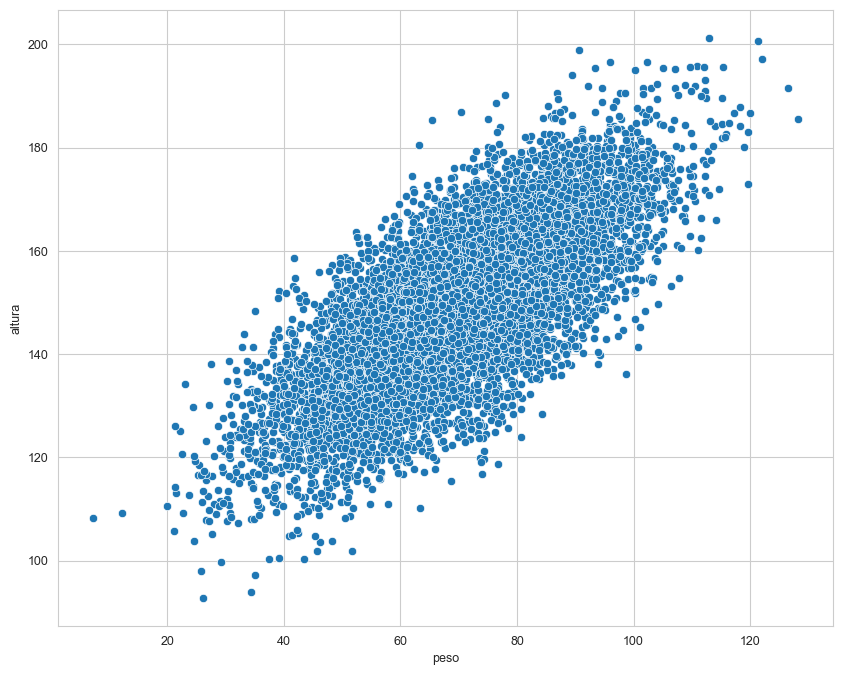

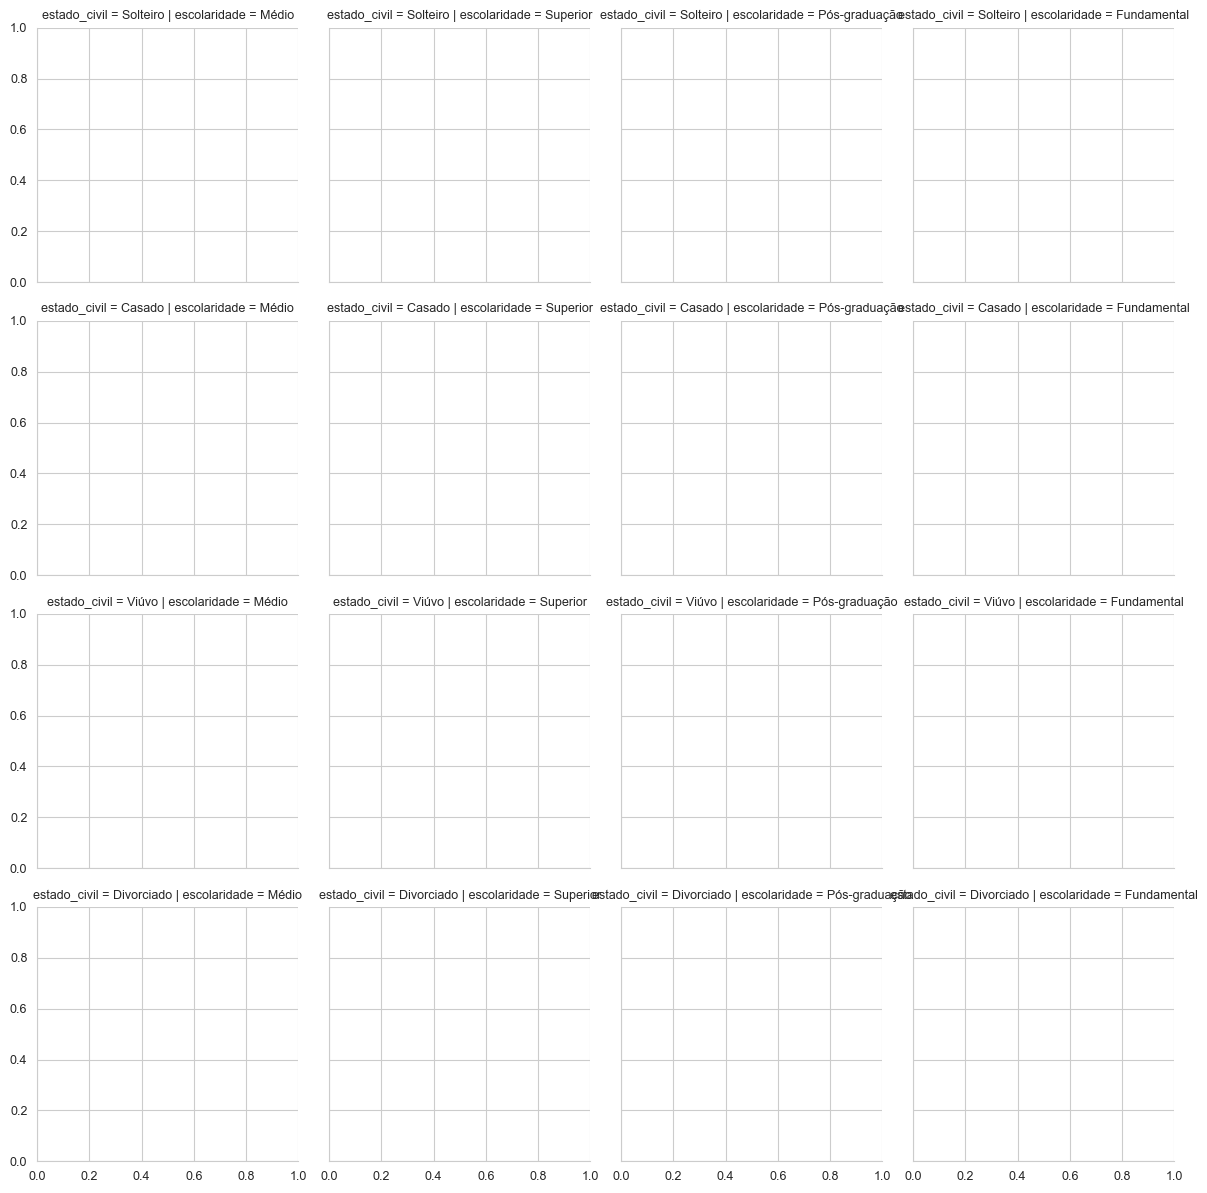

In [126]:
#sns.FacetGrid(df , row ="estado_civil", col= "escolaridade" )
#sns.regplot(df, x= 'peso', y = 'altura')
fig, ax = plt.subplots()
sns.scatterplot(df, x= 'peso', y = 'altura')

g = sns.FacetGrid(df , row ="estado_civil", col= "escolaridade" )
#g.map((sns.scatterplot, "peso", "altura"))

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Códigos Python para Aula 1: Introdução à Análise Exploratória de Dados
"""


# Configurações para melhorar a visualização dos gráficos
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 9
sns.set_style('whitegrid')

# Criação de um conjunto de dados de exemplo para a aula
np.random.seed(42)  # Para reprodutibilidade

# ============================================================================
# Parte 1: Introdução à Análise Exploratória de Dados
# ============================================================================

# Verificação das versões das bibliotecas
def verificar_versoes():
    """Verifica as versões das bibliotecas instaladas."""
    import sys
    print(f"Python versão: {sys.version}")
    print(f"NumPy versão: {np.__version__}")
    print(f"Pandas versão: {pd.__version__}")
    print(f"Matplotlib versão: {plt.matplotlib.__version__}")
    print(f"Seaborn versão: {sns.__version__}")

verificar_versoes()


Python versão: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
NumPy versão: 2.2.4
Pandas versão: 2.2.3
Matplotlib versão: 3.10.1
Seaborn versão: 0.13.2


### **Parte 2: Tipos de Variáveis**

### **Criação de um DataFrame com diferentes tipos de variáveis**

<Axes: title={'center': 'Histogram with KDE'}, xlabel='Value', ylabel='Density'>

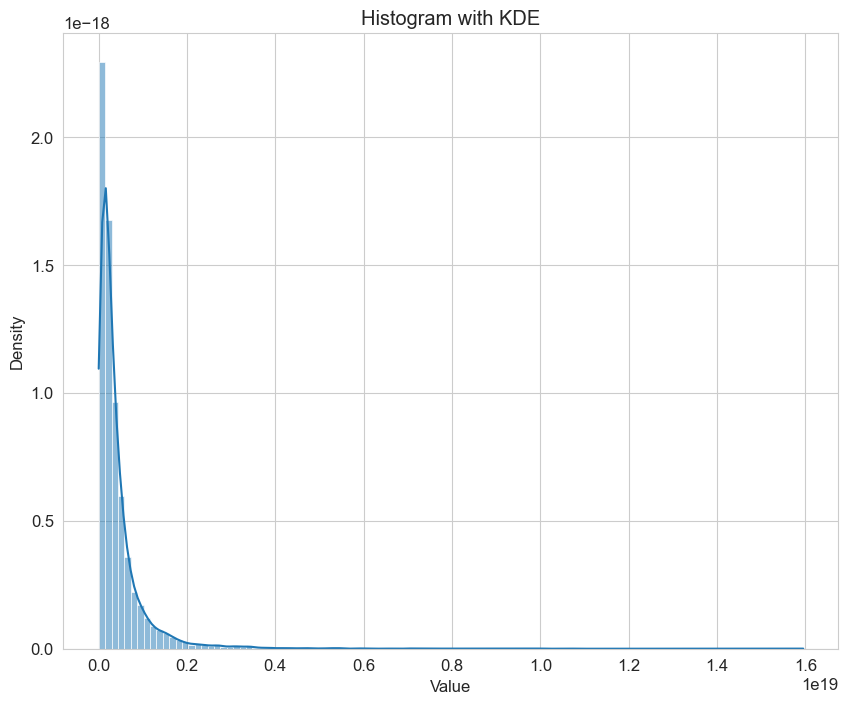

In [ ]:

df = {
    "idade": np.random.randint(18,70,10000),
    "altura": np.random.normal(170, 10, 10000),
    "escolaridade": np.random.choice(["Fundamental", "Medio", "Superior"], 10000, p = [0.3,0.3,0.4]),
    'ct' : np.random.lognormal(40,1.1,10000)
}

pd.DataFrame(dados)

#plt.hist(dados["altura"])

fig, ax = plt.subplots()
# Plot the histogram
#sns.histplot(df['altura'], bins=20, ax=ax, stat='density', kde=True)

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram with KDE')

#
## sturges = 1+3.3(np.log(100))
sns.histplot(df['ct'], bins = 110, ax  = ax, stat = 'density', kde =True)

import statsmodels.api as sm

sm.OLS()

In [87]:

def criar_dataset_exemplo():
    """Cria um DataFrame de exemplo com diferentes tipos de variáveis."""
    # Dados para o exemplo
    dados = {
        'idade': np.random.randint(18, 65, 10000),  # Quantitativa discreta
        'altura': np.random.normal(170, 10, 10000),  # Quantitativa contínua
        'peso': np.random.normal(70, 15, 10000),     # Quantitativa contínua
        'genero': np.random.choice(['Masculino', 'Feminino', 'Não-binário'], 10000),  # Qualitativa nominal
        'escolaridade': np.random.choice(
            ['Fundamental', 'Médio', 'Superior', 'Pós-graduação'], 
            10000, 
            p=[0.1, 0.3, 0.4, 0.2]
        ),  # Qualitativa ordinal
        'estado_civil': np.random.choice(
            ['Solteiro', 'Casado', 'Divorciado', 'Viúvo'], 
            10000, 
            p=[0.4, 0.4, 0.15, 0.05]
        ),  # Qualitativa nominal
        'renda': np.random.choice(
            ['Até R$2.000', 'R$2.001-R$5.000', 'R$5.001-R$10.000', 'Acima de R$10.000'],
            10000,
            p=[0.3, 0.4, 0.2, 0.1]
        ),  # Qualitativa ordinal
        'filhos': np.random.choice([0, 1, 2, 3, 4, 5], 10000, p=[0.3, 0.2, 0.3, 0.1, 0.05, 0.05]),  # Quantitativa discreta
        'satisfacao': np.random.choice([1, 2, 3, 4, 5], 10000),  # Qualitativa ordinal (escala Likert)
              }
    
    # Criação do DataFrame
    df = pd.DataFrame(dados)
    
    # Arredondamento de valores para melhor visualização
    df['altura'] = df['altura'].round(1)
    df['peso'] = df['peso'].round(1)
    
    return df

df = criar_dataset_exemplo()

df

,idade,altura,peso,genero,escolaridade,estado_civil,renda,filhos,satisfacao
0,36,163.2,68.9,Masculino,Médio,Solteiro,R$2.001-R$5.000,0,3
1,42,181.8,93.8,Feminino,Pós-graduação,Casado,R$2.001-R$5.000,1,5
2,35,173.8,110.3,Feminino,Superior,Divorciado,R$2.001-R$5.000,1,2
3,31,188.9,84.9,Masculino,Superior,Solteiro,R$5.001-R$10.000,0,2
4,42,166.5,52.6,Não-binário,Superior,Casado,R$5.001-R$10.000,2,3
...,...,...,...,...,...,...,...,...,...
9995,29,172.1,54.9,Não-binário,Médio,Casado,Até R$2.000,2,4
9996,56,153.9,74.4,Não-binário,Médio,Casado,Até R$2.000,0,2
9997,60,186.1,83.5,Feminino,Pós-graduação,Viúvo,Até R$2.000,2,5
9998,62,185.2,73.0,Masculino,Médio,Divorciado,R$5.001-R$10.000,0,2


In [23]:

# Criação do dataset
df = criar_dataset_exemplo()

# Exibição das primeiras linhas do DataFrame
print("\nPrimeiras linhas do DataFrame:")
print(df.head())

# Informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
print(df.info())

# Estatísticas descritivas básicas
print("\nEstatísticas descritivas básicas:")
print(df.describe())

# Verificação dos tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Conversão de tipos de dados
def converter_tipos_dados(df):
    """Converte os tipos de dados para os mais apropriados."""
    # Cópia do DataFrame para não modificar o original
    df_convertido = df.copy()
    
    # Conversão de variáveis categóricas
    categoricas_nominais = ['genero', 'estado_civil']
    categoricas_ordinais = ['escolaridade', 'renda', 'satisfacao']
    
    # Conversão para tipo categórico
    for col in categoricas_nominais:
        df_convertido[col] = df_convertido[col].astype('category')
    
    # Conversão para tipo categórico ordinal
    # Definição da ordem para cada variável ordinal
    ordem_escolaridade = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']
    ordem_renda = ['Até R$2.000', 'R$2.001-R$5.000', 'R$5.001-R$10.000', 'Acima de R$10.000']
    ordem_satisfacao = [1, 2, 3, 4, 5]
    
    # Aplicação da ordem
    df_convertido['escolaridade'] = pd.Categorical(
        df_convertido['escolaridade'], 
        categories=ordem_escolaridade, 
        ordered=True
    )
    
    df_convertido['renda'] = pd.Categorical(
        df_convertido['renda'], 
        categories=ordem_renda, 
        ordered=True
    )
    
    df_convertido['satisfacao'] = pd.Categorical(
        df_convertido['satisfacao'], 
        categories=ordem_satisfacao, 
        ordered=True
    )
    
    return df_convertido
df


Primeiras linhas do DataFrame:
   idade  altura  peso       genero   escolaridade estado_civil  \
0     18   166.8  71.3    Masculino  Pós-graduação       Casado   
1     30   167.5  92.2  Não-binário       Superior       Casado   
2     38   183.3  52.9     Feminino          Médio     Solteiro   
3     43   175.6  67.1     Feminino          Médio     Solteiro   
4     62   174.6  59.2  Não-binário  Pós-graduação       Casado   

              renda  filhos  satisfacao  codigo_cliente  
0   R$2.001-R$5.000       1           1            1001  
1   R$2.001-R$5.000       3           2            1002  
2   R$2.001-R$5.000       2           4            1003  
3  R$5.001-R$10.000       0           3            1004  
4   R$2.001-R$5.000       2           3            1005  

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -------------- 

,idade,altura,peso,genero,escolaridade,estado_civil,renda,filhos,satisfacao,codigo_cliente
0,18,166.8,71.3,Masculino,Pós-graduação,Casado,R$2.001-R$5.000,1,1,1001
1,30,167.5,92.2,Não-binário,Superior,Casado,R$2.001-R$5.000,3,2,1002
2,38,183.3,52.9,Feminino,Médio,Solteiro,R$2.001-R$5.000,2,4,1003
3,43,175.6,67.1,Feminino,Médio,Solteiro,R$5.001-R$10.000,0,3,1004
4,62,174.6,59.2,Não-binário,Pós-graduação,Casado,R$2.001-R$5.000,2,3,1005
...,...,...,...,...,...,...,...,...,...,...
95,57,170.0,58.0,Feminino,Pós-graduação,Casado,R$2.001-R$5.000,3,3,1096
96,42,168.3,62.8,Feminino,Médio,Divorciado,R$2.001-R$5.000,3,5,1097
97,26,165.5,55.7,Não-binário,Superior,Casado,Até R$2.000,3,1,1098
98,19,177.0,71.8,Masculino,Médio,Solteiro,Até R$2.000,2,2,1099


In [ ]:

# Conversão dos tipos de dados
df_convertido = converter_tipos_dados(df)

# Verificação dos novos tipos
print("\nTipos de dados após conversão:")
print(df_convertido.dtypes)

# Exemplo de como a conversão afeta as operações
print("\nExemplo de ordenação com variável ordinal (escolaridade):")
print(df_convertido['escolaridade'].value_counts().sort_index())


In [ ]:

# ============================================================================
# Parte 3: Distribuições de Frequências
# ============================================================================

# Tabela de frequências para variável qualitativa nominal
def tabela_freq_qualitativa(df, coluna):
    """Cria uma tabela de frequências para uma variável qualitativa."""
    # Frequências absolutas
    freq_abs = df[coluna].value_counts().sort_index()
    
    # Frequências relativas
    freq_rel = df[coluna].value_counts(normalize=True).sort_index() * 100
    
    # Criação da tabela
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel.round(2)
    })
    
    # Adição do total
    tabela.loc['Total'] = [tabela['Frequência Absoluta'].sum(), tabela['Frequência Relativa (%)'].sum().round(2)]
    
    return tabela


In [ ]:

# Exemplo de tabela de frequências para variável qualitativa
print("\nTabela de frequências para Estado Civil:")
print(tabela_freq_qualitativa(df, 'estado_civil'))

# Tabela de frequências para variável qualitativa ordinal
def tabela_freq_qualitativa_ordinal(df, coluna, ordem=None):
    """Cria uma tabela de frequências para uma variável qualitativa ordinal."""
    # Se a ordem não for especificada, usa a ordem do DataFrame convertido
    if ordem is None and coluna in df_convertido.select_dtypes(include='category').columns:
        # Obtém as categorias na ordem correta
        categorias = df_convertido[coluna].cat.categories
        
        # Frequências absolutas na ordem correta
        freq_abs = df[coluna].value_counts().reindex(categorias)
        
        # Frequências relativas na ordem correta
        freq_rel = df[coluna].value_counts(normalize=True).reindex(categorias) * 100
        
        # Frequências acumuladas
        freq_acum = freq_abs.cumsum()
        freq_rel_acum = freq_rel.cumsum()
    else:
        # Caso a coluna não esteja no DataFrame convertido ou a ordem seja especificada
        if ordem is not None:
            # Frequências absolutas na ordem especificada
            freq_abs = df[coluna].value_counts().reindex(ordem)
            
            # Frequências relativas na ordem especificada
            freq_rel = df[coluna].value_counts(normalize=True).reindex(ordem) * 100
        else:
            # Frequências absolutas
            freq_abs = df[coluna].value_counts().sort_index()
            
            # Frequências relativas
            freq_rel = df[coluna].value_counts(normalize=True).sort_index() * 100
        
        # Frequências acumuladas
        freq_acum = freq_abs.cumsum()
        freq_rel_acum = freq_rel.cumsum()
    
    # Criação da tabela
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel.round(2),
        'Frequência Acumulada': freq_acum,
        'Frequência Relativa Acumulada (%)': freq_rel_acum.round(2)
    })
    
    # Adição do total
    tabela.loc['Total'] = [
        tabela['Frequência Absoluta'].sum(), 
        tabela['Frequência Relativa (%)'].sum().round(2),
        tabela['Frequência Acumulada'].max(),
        tabela['Frequência Relativa Acumulada (%)'].max().round(2)
    ]
    
    return tabela


In [ ]:

# Exemplo de tabela de frequências para variável qualitativa ordinal
print("\nTabela de frequências para Escolaridade:")
print(tabela_freq_qualitativa_ordinal(df, 'escolaridade'))

# Tabela de frequências para variável quantitativa discreta
def tabela_freq_quantitativa_discreta(df, coluna):
    """Cria uma tabela de frequências para uma variável quantitativa discreta."""
    # Frequências absolutas
    freq_abs = df[coluna].value_counts().sort_index()
    
    # Frequências relativas
    freq_rel = df[coluna].value_counts(normalize=True).sort_index() * 100
    
    # Frequências acumuladas
    freq_acum = freq_abs.cumsum()
    freq_rel_acum = freq_rel.cumsum()
    
    # Criação da tabela
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel.round(2),
        'Frequência Acumulada': freq_acum,
        'Frequência Relativa Acumulada (%)': freq_rel_acum.round(2)
    })
    
    # Adição do total
    tabela.loc['Total'] = [
        tabela['Frequência Absoluta'].sum(), 
        tabela['Frequência Relativa (%)'].sum().round(2),
        tabela['Frequência Acumulada'].max(),
        tabela['Frequência Relativa Acumulada (%)'].max().round(2)
    ]
    
    return tabela

# Exemplo de tabela de frequências para variável quantitativa discreta
print("\nTabela de frequências para Número de Filhos:")
print(tabela_freq_quantitativa_discreta(df, 'filhos'))


In [ ]:

# Tabela de frequências para variável quantitativa contínua (com intervalos de classe)
def tabela_freq_quantitativa_continua(df, coluna, n_classes=None):
    """
    Cria uma tabela de frequências para uma variável quantitativa contínua,
    usando intervalos de classe.
    """
    # Se o número de classes não for especificado, usa a regra de Sturges
    if n_classes is None:
        n_classes = int(1 + 3.322 * np.log10(len(df)))
    
    # Criação dos intervalos de classe
    classes = pd.cut(df[coluna], bins=n_classes)
    
    # Frequências absolutas
    freq_abs = classes.value_counts().sort_index()
    
    # Frequências relativas
    freq_rel = classes.value_counts(normalize=True).sort_index() * 100
    
    # Frequências acumuladas
    freq_acum = freq_abs.cumsum()
    freq_rel_acum = freq_rel.cumsum()
    
    # Criação da tabela
    tabela = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel.round(2),
        'Frequência Acumulada': freq_acum,
        'Frequência Relativa Acumulada (%)': freq_rel_acum.round(2)
    })
    
    # Adição do total
    tabela.loc['Total'] = [
        tabela['Frequência Absoluta'].sum(), 
        tabela['Frequência Relativa (%)'].sum().round(2),
        tabela['Frequência Acumulada'].max(),
        tabela['Frequência Relativa Acumulada (%)'].max().round(2)
    ]
    
    return tabela

# Exemplo de tabela de frequências para variável quantitativa contínua
print("\nTabela de frequências para Altura (com intervalos de classe):")
print(tabela_freq_quantitativa_continua(df, 'altura', n_classes=7))

# ============================================================================
# Parte 4: Visualização de Dados
# ============================================================================

# Gráficos para variáveis qualitativas


In [ ]:

def grafico_barras(df, coluna, titulo=None, xlabel=None, ylabel=None, ordenar=False):
    """Cria um gráfico de barras para uma variável qualitativa."""
    plt.figure(figsize=(12, 8))
    
    # Se ordenar for True, ordena por frequência
    if ordenar:
        contagem = df[coluna].value_counts()
    else:
        contagem = df[coluna].value_counts().sort_index()
    
    # Criação do gráfico
    ax = contagem.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Adição de rótulos
    if titulo:
        plt.title(titulo, fontsize=16)
    else:
        plt.title(f'Gráfico de Barras - {coluna}', fontsize=16)
    
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(coluna, fontsize=14)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel('Frequência', fontsize=14)
    
    # Adição de valores sobre as barras
    for i, v in enumerate(contagem):
        ax.text(i, v + 0.5, str(v), ha='center', fontsize=12)
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig(f'grafico_barras_{coluna}.png')
    plt.close()

# Exemplo de gráfico de barras para variável qualitativa nominal
grafico_barras(df, 'estado_civil', titulo='Distribuição por Estado Civil', ordenar=True)

def grafico_setores(df, coluna, titulo=None):
    """Cria um gráfico de setores (pizza) para uma variável qualitativa."""
    plt.figure(figsize=(10, 10))
    
    # Contagem de valores
    contagem = df[coluna].value_counts()
    
    # Criação do gráfico
    plt.pie(
        contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%',
        startangle=90, 
        shadow=True,
        explode=[0.05] * len(contagem),  # Pequena separação de todos os setores
        colors=plt.cm.Paired(np.arange(len(contagem)) / len(contagem))  # Cores diferentes
    )
    
    # Adição de título
    if titulo:
        plt.title(titulo, fontsize=16)
    else:
        plt.title(f'Gráfico de Setores - {coluna}', fontsize=16)
    
    plt.axis('equal')  # Garante que o gráfico seja um círculo
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig(f'grafico_setores_{coluna}.png')
    plt.close()

# Exemplo de gráfico de setores para variável qualitativa nominal
grafico_setores(df, 'genero', titulo='Distribuição por Gênero')

# Gráficos para variáveis quantitativas

def histograma(df, coluna, bins=None, titulo=None, xlabel=None, ylabel=None, kde=False):
    """Cria um histograma para uma variável quantitativa."""
    plt.figure(figsize=(12, 8))
    
    # Se o número de bins não for especificado, usa a regra de Sturges
    if bins is None:
        bins = int(1 + 3.322 * np.log10(len(df)))
    
    # Criação do histograma
    if kde:
        sns.histplot(df[coluna], bins=bins, kde=True, color='skyblue', edgecolor='black')
    else:
        plt.hist(df[coluna], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Adição de rótulos
    if titulo:
        plt.title(titulo, fontsize=16)
    else:
        plt.title(f'Histograma - {coluna}', fontsize=16)
    
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(coluna, fontsize=14)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel('Frequência', fontsize=14)
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig(f'histograma_{coluna}.png')
    plt.close()

# Exemplo de histograma para variável quantitativa contínua
histograma(df, 'altura', titulo='Distribuição de Alturas', kde=True)

def poligono_frequencia(df, coluna, bins=None, titulo=None, xlabel=None, ylabel=None):
    """Cria um polígono de frequência para uma variável quantitativa."""
    plt.figure(figsize=(12, 8))
    
    # Se o número de bins não for especificado, usa a regra de Sturges
    if bins is None:
        bins = int(1 + 3.322 * np.log10(len(df)))
    
    # Cálculo do histograma
    counts, bin_edges = np.histogram(df[coluna], bins=bins)
    
    # Cálculo dos pontos médios dos bins
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    # Criação do polígono de frequência
    plt.plot(bin_centers, counts, 'o-', color='blue', linewidth=2, markersize=8)
    
    # Adição de rótulos
    if titulo:
        plt.title(titulo, fontsize=16)
    else:
        plt.title(f'Polígono de Frequência - {coluna}', fontsize=16)
    
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(coluna, fontsize=14)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel('Frequência', fontsize=14)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig(f'poligono_frequencia_{coluna}.png')
    plt.close()

# Exemplo de polígono de frequência para variável quantitativa contínua
poligono_frequencia(df, 'peso', titulo='Distribuição de Pesos')

def ogiva(df, coluna, bins=None, titulo=None, xlabel=None, ylabel=None):
    """Cria uma ogiva (curva de frequência acumulada) para uma variável quantitativa."""
    plt.figure(figsize=(12, 8))
    
    # Se o número de bins não for especificado, usa a regra de Sturges
    if bins is None:
        bins = int(1 + 3.322 * np.log10(len(df)))
    
    # Cálculo do histograma
    counts, bin_edges = np.histogram(df[coluna], bins=bins)
    
    # Cálculo das frequências acumuladas
    cum_counts = np.cumsum(counts)
    
    # Criação da ogiva
    plt.plot(bin_edges[1:], cum_counts, 'o-', color='blue', linewidth=2, markersize=8)
    
    # Adição de rótulos
    if titulo:
        plt.title(titulo, fontsize=16)
    else:
        plt.title(f'Ogiva - {coluna}', fontsize=16)
    
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(coluna, fontsize=14)
    
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel('Frequência Acumulada', fontsize=14)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig(f'ogiva_{coluna}.png')
    plt.close()

# Exemplo de ogiva para variável quantitativa contínua
ogiva(df, 'idade', titulo='Distribuição Acumulada de Idades')


In [ ]:

# ============================================================================
# Parte 5: Técnicas Especiais de Visualização
# ============================================================================

def ramo_e_folhas(dados, escala=1, titulo=None):
    """
    Cria um diagrama de ramo-e-folhas.
    
    Parâmetros:
    dados: lista ou array de números
    escala: fator para determinar a divisão entre ramo e folha
    titulo: título do diagrama
    """
    # Escalar os dados
    dados_escalados = [x * escala for x in dados]
    
    # Extrair ramos e folhas
    ramos_folhas = {}
    for valor in dados_escalados:
        ramo = int(valor) // 10
        folha = int(valor) % 10
        if ramo in ramos_folhas:
            ramos_folhas[ramo].append(folha)
        else:
            ramos_folhas[ramo] = [folha]
    
    # Ordenar folhas e imprimir
    print("\nDiagrama de Ramo-e-Folhas")
    if titulo:
        print(titulo)
    print("Ramo | Folhas")
    print("-" * 20)
    
    for ramo in sorted(ramos_folhas.keys()):
        folhas = sorted(ramos_folhas[ramo])
        print(f"{ramo:4d} | {' '.join(map(str, folhas))}")
    
    # Informações adicionais
    print("-" * 20)
    print(f"Escala: {1/escala:.1f}")
    
    # Retorna o dicionário para uso posterior, se necessário
    return ramos_folhas

# Exemplo de diagrama de ramo-e-folhas para idades
print("\nDiagrama de Ramo-e-Folhas para Idades:")
ramo_e_folhas(df['idade'], titulo="Distribuição de Idades")

# Implementação visual do diagrama de ramo-e-folhas
def ramo_e_folhas_visual(dados, escala=1, titulo=None):
    """
    Cria uma representação visual do diagrama de ramo-e-folhas.
    
    Parâmetros:
    dados: lista ou array de números
    escala: fator para determinar a divisão entre ramo e folha
    titulo: título do diagrama
    """
    # Escalar os dados
    dados_escalados = [x * escala for x in dados]
    
    # Extrair ramos e folhas
    ramos_folhas = {}
    for valor in dados_escalados:
        ramo = int(valor) // 10
        folha = int(valor) % 10
        if ramo in ramos_folhas:
            ramos_folhas[ramo].append(folha)
        else:
            ramos_folhas[ramo] = [folha]
    
    # Criar figura
    plt.figure(figsize=(12, len(ramos_folhas) * 0.5 + 2))
    
    # Ordenar ramos
    ramos_ordenados = sorted(ramos_folhas.keys())
    
    # Para cada ramo
    for i, ramo in enumerate(ramos_ordenados):
        # Ordenar folhas
        folhas = sorted(ramos_folhas[ramo])
        
        # Texto do ramo
        plt.text(0, len(ramos_ordenados) - i - 1, f"{ramo} |", fontsize=12, ha='right', va='center')
        
        # Texto das folhas
        plt.text(0.1, len(ramos_ordenados) - i - 1, " ".join(map(str, folhas)), fontsize=12, ha='left', va='center')
    
    # Configurações do gráfico
    plt.xlim(-0.5, 10)
    plt.ylim(-0.5, len(ramos_ordenados) - 0.5)
    plt.axis('off')
    
    # Título
    if titulo:
        plt.title(titulo, fontsize=16, pad=20)
    else:
        plt.title("Diagrama de Ramo-e-Folhas", fontsize=16, pad=20)
    
    # Adicionar informação de escala
    plt.figtext(0.5, 0.01, f"Escala: {1/escala:.1f}", ha='center', fontsize=12)
    
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig('ramo_e_folhas.png')
    plt.close()

# Exemplo de diagrama de ramo-e-folhas visual para idades
ramo_e_folhas_visual(df['idade'], titulo="Distribuição de Idades")


In [ ]:

# ============================================================================
# Exemplos de Aplicação Prática
# ============================================================================

# Exemplo 1: Análise de distribuição de idades por gênero
def exemplo_distribuicao_idade_genero():
    """Exemplo de análise da distribuição de idades por gênero."""
    plt.figure(figsize=(12, 8))
    
    # Criação do histograma
    sns.histplot(
        data=df, 
        x='idade', 
        hue='genero', 
        multiple='stack',
        palette='pastel',
        edgecolor='black',
        alpha=0.7,
        bins=10
    )
    
    plt.title('Distribuição de Idades por Gênero', fontsize=16)
    plt.xlabel('Idade', fontsize=14)
    plt.ylabel('Frequência', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig('distribuicao_idade_genero.png')
    plt.close()

# Exemplo 2: Relação entre escolaridade e renda
def exemplo_escolaridade_renda():
    """Exemplo de análise da relação entre escolaridade e renda."""
    # Tabela de contingência
    tabela = pd.crosstab(df['escolaridade'], df['renda'])
    
    # Normalização por linha
    tabela_norm = tabela.div(tabela.sum(axis=1), axis=0) * 100
    
    plt.figure(figsize=(14, 10))
    
    # Criação do gráfico de calor
    sns.heatmap(
        tabela_norm, 
        annot=True, 
        cmap='YlGnBu', 
        fmt='.1f',
        linewidths=0.5,
        cbar_kws={'label': 'Percentual (%)'}
    )
    
    plt.title('Relação entre Escolaridade e Renda', fontsize=16)
    plt.xlabel('Renda', fontsize=14)
    plt.ylabel('Escolaridade', fontsize=14)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig('relacao_escolaridade_renda.png')
    plt.close()

# Exemplo 3: Distribuição de satisfação por estado civil
def exemplo_satisfacao_estado_civil():
    """Exemplo de análise da distribuição de satisfação por estado civil."""
    plt.figure(figsize=(14, 10))
    
    # Criação do gráfico de barras agrupadas
    sns.countplot(
        data=df, 
        x='estado_civil', 
        hue='satisfacao',
        palette='viridis',
        edgecolor='black'
    )
    
    plt.title('Distribuição de Satisfação por Estado Civil', fontsize=16)
    plt.xlabel('Estado Civil', fontsize=14)
    plt.ylabel('Frequência', fontsize=14)
    plt.legend(title='Nível de Satisfação')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plt.savefig('satisfacao_estado_civil.png')
    plt.close()

# Execução dos exemplos
exemplo_distribuicao_idade_genero()
exemplo_escolaridade_renda()
exemplo_satisfacao_estado_civil()


In [ ]:

# ============================================================================
# Salvando o DataFrame para uso futuro
# ============================================================================

# Salvar o DataFrame em formato CSV
df.to_csv('dados_exemplo.csv', index=False)

print("\nTodos os códigos foram executados com sucesso!")
print("Os gráficos foram salvos no diretório de trabalho.")
print("O DataFrame foi salvo como 'dados_exemplo.csv'.")
